In [1]:
import pathlib

from couplings import metropolis_hastings
from couplings.utils import plot_coupled_chains, mixture_of_gaussians
import numpy as np

import matplotlib.pyplot as plt


image_dir = pathlib.Path("..", "static", "img").resolve()
assert image_dir.exists()

In [2]:
plt.style.use('tufte')

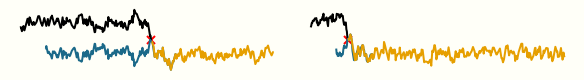

In [3]:
np.random.seed(4)
chains = 2
rv = mixture_of_gaussians(((3, 1), (-3, 1)), (0.5, 0.5))
log_prob = rv.logpdf

data = metropolis_hastings(
        log_prob=log_prob, 
        proposal_cov=0.5,
        init_x=2,
        init_y=-2,
        lag=50, 
        iters=500, 
        chains=chains)

axes = plot_coupled_chains(data, max_chains=2)
fig = axes[0].get_figure()
fig.set_figheight(1)
fig.set_figwidth(8)

for ax in axes.ravel():
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_facecolor("none")
    
fig.savefig(image_dir / 'header.png')